# Initial visualization

Simple initial data visualization.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# Render plots in notebook
%matplotlib inline

data_dir = "./extracted"
boot_times_path = "{}/boot_times.csv".format(data_dir)
bandwidth_path = "{}/bandwidth_results.csv".format(data_dir)
jitter_path = "{}/jitter_results.csv".format(data_dir)
fileior_path = "{}/fileio_read_results.csv".format(data_dir)
fileiow_path  ="{}/fileio_write_results.csv".format(data_dir)
cpu_path = "{}/cpu_results.csv".format(data_dir)
http_path = "{}/http_benchmark_results.csv".format(data_dir)
pipeline_path = "{}/pipeline_results.csv".format(data_dir)
database_path = "{}/database_results.csv".format(data_dir)


## Boot times

Mean boot times per platform.

Text(0, 0.5, 'Seconds')

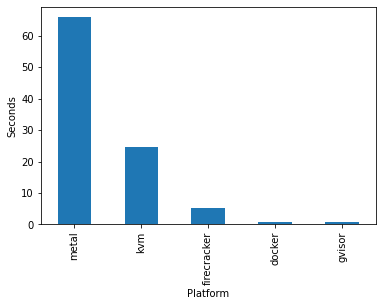

In [2]:
df = pd.read_csv(boot_times_path)

ax = df.mean().plot.bar()
ax.set_xlabel("Platform")
ax.set_ylabel("Seconds")

## Bandwidth and jitter

Mean network bandwidth and jitter.

### Bandwidth

Bandwidth bit / second and CPU usage percentage with TCP traffic.

Text(0, 0.5, 'CPU (%)')

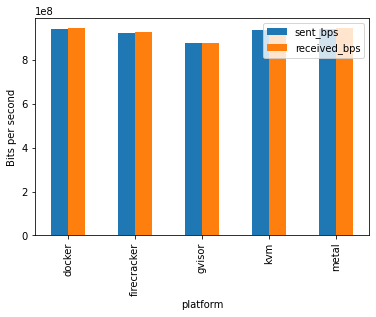

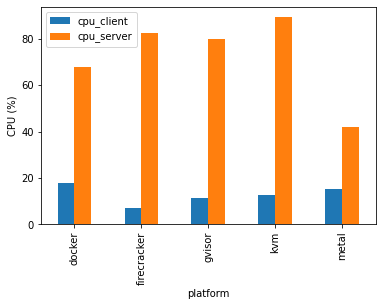

In [3]:
df = pd.read_csv(bandwidth_path)

group = df.groupby(["platform"]).mean()

ax = group.plot.bar(y=["sent_bps", "received_bps"])
ax.set_ylabel("Bits per second")
ax = group.plot.bar(y=["cpu_client", "cpu_server"])
ax.set_ylabel("CPU (%)")


### Jitter

Network jitter with UDP traffic.

Text(0, 0.5, 'CPU (%)')

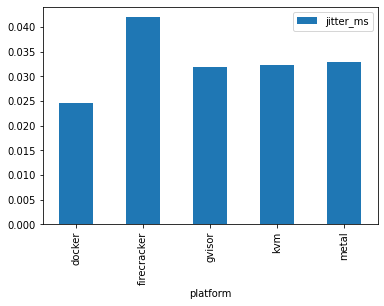

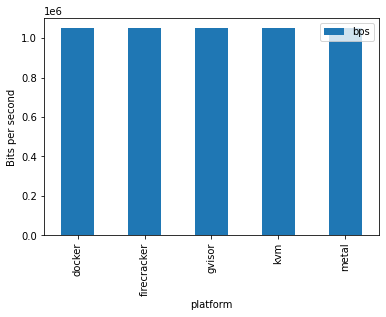

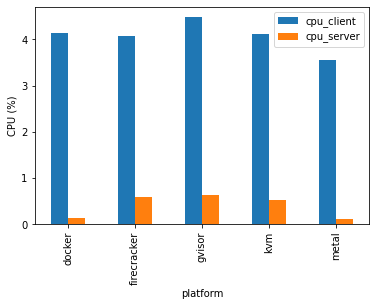

In [4]:
df = pd.read_csv(jitter_path)

group = df.groupby(["platform"]).mean()

group.plot.bar(y=["jitter_ms"])
ax = group.plot.bar(y=["bps"])
ax.set_ylabel("Bits per second")
ax = group.plot.bar(y=["cpu_client", "cpu_server"])
ax.set_ylabel("CPU (%)")

## File I/O

Filesystem I/O read and write results (bytes per second).

Text(0, 0.5, 'File read MiB/s')

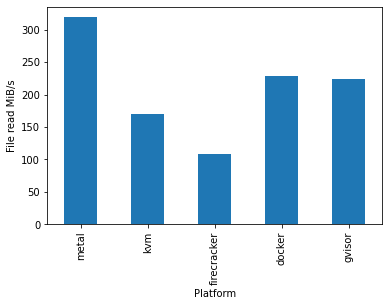

In [5]:
df = pd.read_csv(fileior_path)

ax = df.mean().plot.bar()
ax.set_xlabel("Platform")
ax.set_ylabel("File read MiB/s")


Text(0, 0.5, 'File write MiB/s')

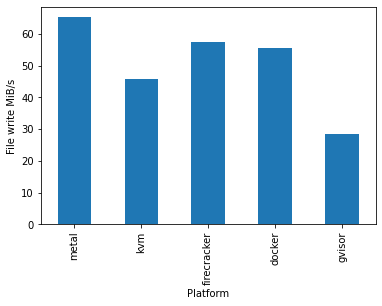

In [6]:
df = pd.read_csv(fileiow_path)

ax = df.mean().plot.bar()
ax.set_xlabel("Platform")
ax.set_ylabel("File write MiB/s")


## CPU

Mean CPU `sysbench` events / second per platform.

Text(0, 0.5, 'Events per second')

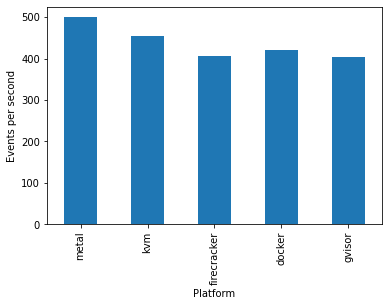

In [7]:
df = pd.read_csv(cpu_path)
ax = df.mean().plot.bar()
ax.set_xlabel("Platform")
ax.set_ylabel("Events per second")


## HTTP Benchmark

HTTP benchmark results.

Text(0, 0.5, 'Mean time per request (ms)')

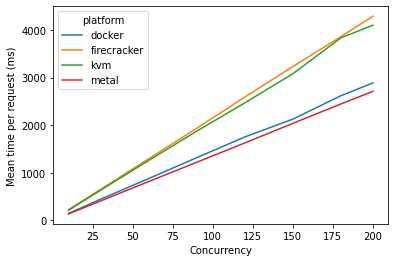

In [8]:
df = pd.read_csv(http_path)
ax = df.groupby(["platform", "concurrency"]).mean().reset_index().pivot(index="concurrency", columns="platform", values="mean_time_per_req").plot()
ax.set_xlabel("Concurrency")
ax.set_ylabel("Mean time per request (ms)")

## Pipeline results

Build pipeline results.

Text(0, 0.5, 'Time (seconds)')

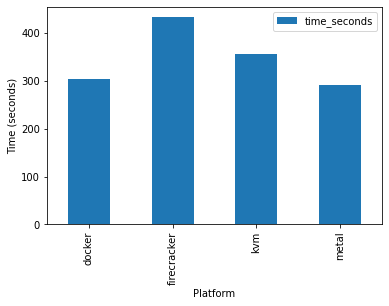

In [9]:
df = pd.read_csv(pipeline_path)

ax = df.groupby(["platform"]).mean().plot.bar()
ax.set_xlabel("Platform")
ax.set_ylabel("Time (seconds)")

## Database

Database performance results.

Text(0, 0.5, 'Transactions per second')

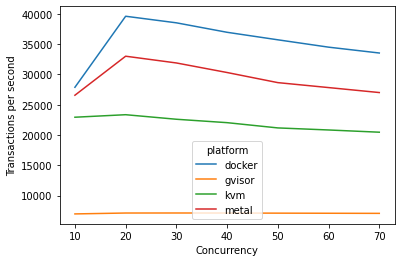

In [18]:
df = pd.read_csv(database_path)

read_only = df[df.write_queries.eq(0)]

ax = read_only.groupby(["platform", "concurrency"]).mean().reset_index().pivot(index="concurrency", columns="platform", values="transactions").plot()
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")


Text(0, 0.5, 'Transactions per second')

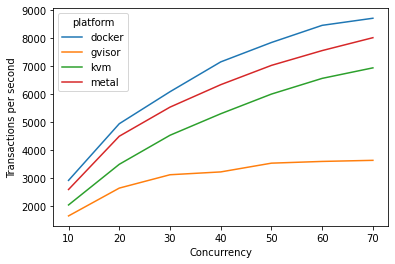

In [19]:
write_only = df[df.read_queries.eq(0)]
ax = write_only.groupby(["platform", "concurrency"]).mean().reset_index().pivot(index="concurrency", columns="platform", values="transactions").plot()
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")


Text(0, 0.5, 'Transactions per second')

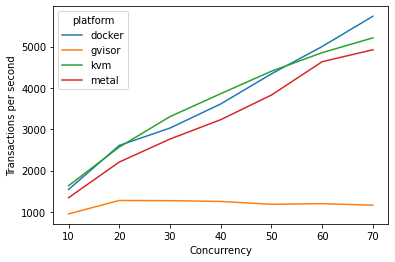

In [20]:
read_write = df[df.write_queries.ne(0) & df.read_queries.ne(0)]

ax = read_write.groupby(["platform", "concurrency"]).mean().reset_index().pivot(index="concurrency", columns="platform", values="transactions").plot()
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")